<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Regression_PE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


1. AT - Atmospheric Temperature
2. V - Vaccum Pressure
3. AP - Atmospheric Pressure
4. RH - Relative Humidity
5. PE - Powerplant output in MW (Target)

### Step 2- Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [5]:
df.duplicated().sum()

41

In [6]:
# Remove the duplicate values
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9522,15.12,48.92,1011.80,72.93,462.59
9523,33.41,77.95,1010.30,59.72,432.90
9524,15.99,43.34,1014.20,78.66,465.96
9525,17.65,59.87,1018.58,94.65,450.93


### Step 3 - Seperate X and Y(PE)

In [7]:
X = df.drop(columns = ["PE"])
Y = df[["PE"]]

In [8]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [9]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4 - Apply preprocessing on X

In [10]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Step 4 - Apply train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [15]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [16]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [17]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [18]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [19]:
xtrain.shape

(7621, 4)

In [20]:
xtest.shape

(1906, 4)

In [22]:
xtrain.shape[1]

4

### Step 5 - Training the neural network
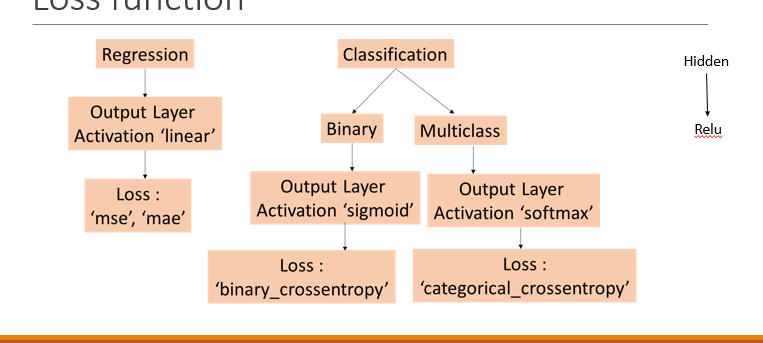

In [21]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [23]:
# Initialize the neural network
model = Sequential()

# Create an input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Create a hidden layer 1
model.add(Dense(units=8, activation="relu"))

# Create a hidden layer 2
model.add(Dense(units=4, activation="relu"))

# Create a output layer
model.add(Dense(units=1, activation="linear"))


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [26]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 206882.5938 - mae: 454.5190 - val_loss: 202734.3906 - val_mae: 449.9472
Epoch 2/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201966.0156 - mae: 449.1193 - val_loss: 192898.3281 - val_mae: 438.9406
Epoch 3/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 189780.7031 - mae: 435.3566 - val_loss: 171210.4844 - val_mae: 413.3957
Epoch 4/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 164422.1875 - mae: 404.8763 - val_loss: 136304.0469 - val_mae: 367.7485
Epoch 5/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 127428.8281 - mae: 354.7181 - val_loss: 94399.5391 - val_mae: 301.7505
Epoch 6/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86111.0938 - mae: 285.8178 - val_loss: 57638.5898 - val_mae: 223.5690
Epoch 7/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52431.6562 - mae: 210.4639 - val_loss: 35337.5195 - val_mae: 162.6568
Epoch 8/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33103.6133 - mae: 157

In [28]:
hist.history["loss"]

[205698.28125,
 199637.734375,
 184400.96875,
 156106.359375,
 117170.7890625,
 76623.90625,
 46463.6640625,
 30407.556640625,
 23203.55859375,
 19356.837890625,
 16515.431640625,
 14019.099609375,
 11701.546875,
 9523.7109375,
 7516.81494140625,
 5727.498046875,
 4206.015625,
 2994.98876953125,
 2094.294677734375,
 1463.1427001953125,
 1035.898193359375,
 746.2239990234375,
 547.7947998046875,
 412.043212890625,
 317.39910888671875,
 249.88626098632812,
 200.51669311523438,
 162.39276123046875,
 133.31985473632812,
 110.75244140625,
 92.67566680908203,
 78.20648193359375,
 66.3258285522461,
 56.67782211303711,
 49.09077835083008,
 42.879432678222656,
 38.0374641418457,
 34.44193649291992,
 31.578771591186523,
 29.465543746948242,
 27.740985870361328,
 26.562185287475586,
 25.56187629699707,
 24.736804962158203,
 24.127399444580078,
 23.569520950317383,
 23.22153663635254,
 22.875118255615234,
 22.62053680419922,
 22.329076766967773,
 22.1507625579834,
 22.056678771972656,
 21.99615859

In [29]:
hist.history["val_loss"]

[202734.390625,
 192898.328125,
 171210.484375,
 136304.046875,
 94399.5390625,
 57638.58984375,
 35337.51953125,
 25415.41015625,
 20836.373046875,
 17864.05859375,
 15345.724609375,
 13025.0166015625,
 10787.67578125,
 8685.3955078125,
 6775.3876953125,
 5089.9814453125,
 3688.514404296875,
 2598.7021484375,
 1806.801025390625,
 1261.2030029296875,
 892.1780395507812,
 642.2455444335938,
 470.4107360839844,
 356.1988220214844,
 275.40802001953125,
 218.0803680419922,
 174.48793029785156,
 142.7212677001953,
 117.0452880859375,
 97.67166900634766,
 82.52232360839844,
 69.85799407958984,
 59.89530563354492,
 51.32423782348633,
 44.696868896484375,
 39.41228103637695,
 35.35162353515625,
 32.04841613769531,
 29.91146469116211,
 27.950002670288086,
 26.322574615478516,
 25.336498260498047,
 24.625621795654297,
 23.981117248535156,
 23.185705184936523,
 23.005556106567383,
 22.856857299804688,
 22.192363739013672,
 22.324705123901367,
 21.888818740844727,
 21.981401443481445,
 21.72854423

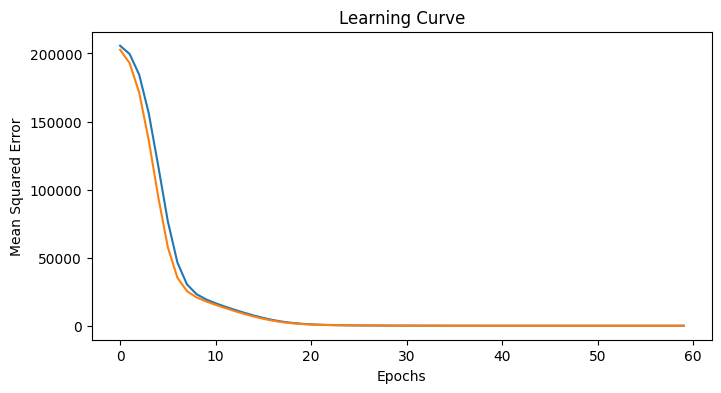

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.show()

### Model evaluation

In [31]:
model.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.1929 - mae: 3.6677


[21.38733673095703, 3.664940357208252]

In [32]:
model.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 19.9353 - mae: 3.5862


[21.270479202270508, 3.691699266433716]

In [33]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [34]:
ypred_test[0:5]

array([[427.616  ],
       [481.23865],
       [482.6504 ],
       [451.06686],
       [448.61417]], dtype=float32)

In [35]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [36]:
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.925589919090271

In [37]:
r2_score(ytest, ypred_test)

0.9295188784599304

### Above has r2 score of 0.92 > 0.8 hence it is a good model

### Out of sample prediction

In [38]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [39]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [40]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [42]:
pred= model.predict(xnew_pre)
pred[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


array([[446.1097 ],
       [439.65753],
       [431.50998],
       [440.77228],
       [473.84076]], dtype=float32)

In [43]:
xnew["PE_pred"] = pred

In [48]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,446.109985
1,28.88,54.89,1007.16,46.60,439.660004
2,27.89,73.21,1001.32,85.88,431.510010
3,25.69,62.26,1011.38,74.08,440.769989
4,12.16,40.81,1025.79,70.97,473.839996
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,438.179993
96,11.78,39.96,1011.37,82.95,471.839996
97,5.62,41.38,1020.91,86.21,484.059998
98,24.96,74.99,1008.25,80.52,438.279999


In [49]:
xnew.to_csv("Results.csv", index=False)

### Saving the model object

In [50]:
model.save("powerplant.keras")

### Load the model

In [51]:
from keras.models import load_model
nn = load_model("/content/powerplant.keras")
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)